In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

#### Generating Data

In [2]:
X,Y = make_blobs?

In [9]:
X,Y = make_blobs(n_samples=500,centers=2,n_features=2,random_state=11)

In [10]:
X.shape,Y.shape

((500, 2), (500,))

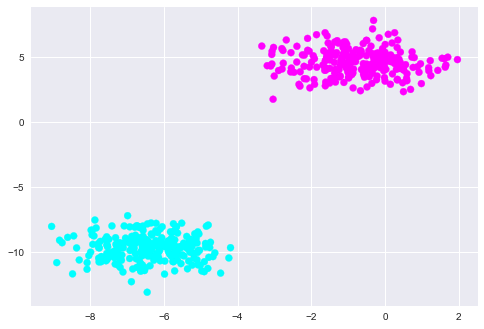

In [12]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap= plt.cm.cool)
plt.show()

#### Model and helper functions

In [54]:
def sigmoid(z):
    return (1.0)/(1+np.exp(-z));

##### Implement Perceptron Learning Algorithm
- Learn the weights
- Reduce the loss 
- Make the predictions

In [91]:
def predict(X,weights):
#     X--> m * n matrix , w --> n * 1 matrix    
    z = np.dot(X,weights)
    predictions = sigmoid(z)
    return predictions
def loss(X,Y,weights):
#     Binary cross Entropy
    Y_hat = predict(X,weights)
    cost = np.mean(-Y*np.log(Y_hat) - (1-Y)*np.log(1-Y_hat))
    return cost
def update(X,Y,weights,learning_rate):
    """Perform weights updates for 1 epoch"""
    Y_hat = predict(X,weights)
    dw = np.dot(X.T,Y_hat-Y)
    weights = weights - learning_rate*dw/(float(X.shape[0]))
    return weights
def train(X,Y,learning_rate = 0.5 ,maxEpochs = 100):
    ### modifing the input to take bias term 
    ones = np.ones((X.shape[0],1))
    X= np.hstack((ones,X))
    ## intializing weights to zero
    weights = np.zeros(X.shape[1])
    error_list = []
    # iterating over all epochs and making updates
    for i in range(maxEpochs):
        weights = update(X,Y,weights,learning_rate)
        error_list.append(loss(X,Y,weights))
    return weights,error_list

In [130]:
weights,error_list =  train(X,Y,learning_rate=0.9,maxEpochs=1000)

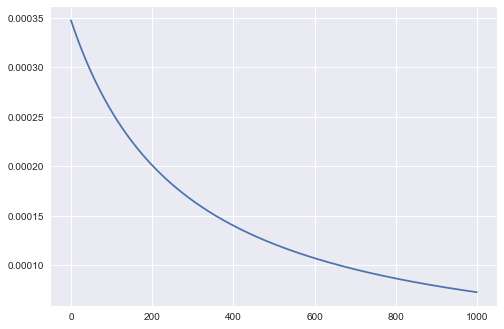

In [131]:
plt.plot(error_list)

In [132]:
def getPredictions(X_Test,weights,labels= True):
    if X_Test.shape[1] != weights.shape[0]:
        ones = np.ones((X_Test.shape[0],1))
        X_Test = np.hstack((ones,X_Test))
    probs = predict(X_Test,weights)
    if not labels:
        return probs
    label = np.zeros(probs.shape)
    label[probs >= 0.5] = 1
    return label

In [133]:
def accuracy(X_Test,Y_test,weights):
    pred = getPredictions(X_Test,weights)
    correct = np.sum(pred==Y_test)
    return correct/pred.shape[0]

In [134]:
accuracy(X,Y,weights)*100 
## 100% accuracy xD!!

100.0

In [135]:
weights 

array([0.12615204, 0.90389096, 3.44208242])

In [136]:
x1 = np.linspace(-10,3,14)
x2 = -(weights[0] + x1*weights[1])/weights[2]

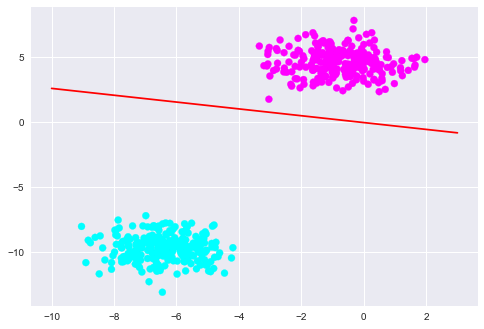

In [138]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.cool)
plt.plot(x1,x2,color = "red")

In [156]:
## lets try on some differnt dataset

In [139]:
from sklearn.datasets import make_moons

In [140]:
X,Y = make_moons(n_samples=500,shuffle=True,noise=0.2,random_state=1)

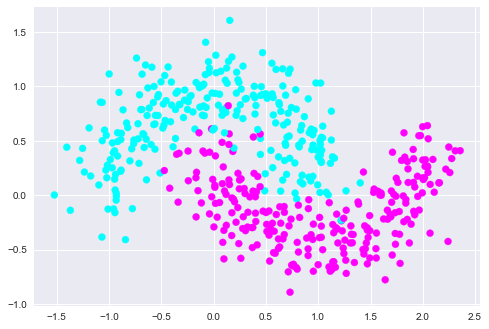

In [141]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.cool)

In [148]:
weights,error_list = train(X,Y,learning_rate=1,maxEpochs=500)

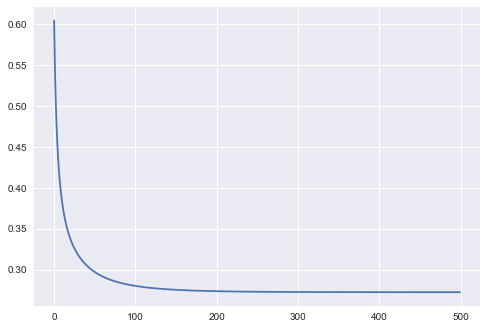

In [149]:
plt.plot(error_list)

In [151]:
accuracy(X,Y,weights)

0.886

In [154]:
x1 = np.linspace(-2,3,14)
x2 = -(weights[0] + x1*weights[1])/weights[2]

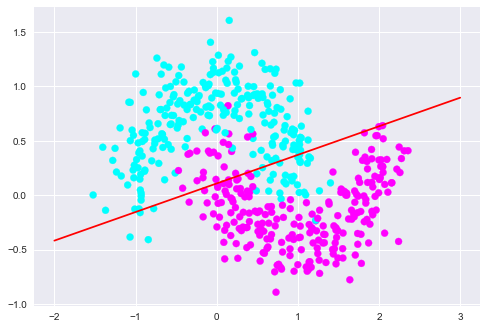

In [155]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.cool)
plt.plot(x1,x2,color = "red")

In [157]:
accuracy(X,Y,weights)

0.886

In [158]:
##Still a decent accuracy but this model cant work on this 